### 강한 연결요소(Strongly Connected Component)
- 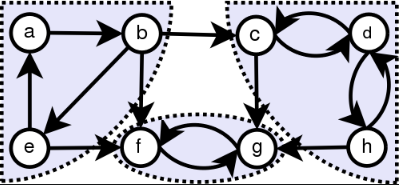
- (1번 성질)어떤 방향 그래프의 부분 집합 속 임의의 두 정점 `u`, `v`에 대해서 `u` -> `v`와 `v` -> `u`로 가는 직/간접적인 경로가 모두 존재할 때 `u`와 `v`는 강하게 연결되어 있다고 한다.
  - 즉, `u`와 `v`는 어떻게 골라도 서로에게 도달할 수 있다는 뜻이다. 2개 이상으로 크기가 커져도 성립한다.
- (2번 성질)강하게 연결돼어있는 요소들의 집합(subgraph) 중 가능한한 커야 한다. (maximal 해야 한다)
  - 즉 SCC는 maximal strongly connected subgraph이다.
  - `{c, d}`는 서로의 정점으로 가는 경로가 있지만, 여기에 `h`을 추가해도 여전히 성질이 만족하므로, 이는 SCC가 아니다.
  - 즉, `{c, d, h}`만 SCC로 볼 수 있다.
- SCC는 사이클보다 상위 개념이다.
  - 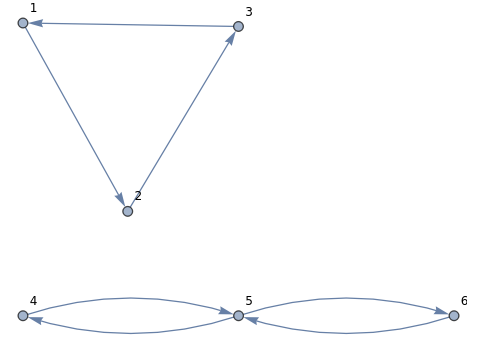
  - 여기서 `{1, 2, 3}`은 사이클이면서 SCC이지만, `{4, 5, 6}`은 SCC는 성립하지만 사이클이라고 볼 순 없다. 위의 `{c, d, h}`도 마찬가지.
- 선형시간인 $O(V+E)$만에 구할 수 있다.

### 구현(Tarjan's)
- 한번의 DFS로 구하는 알고리즘.
- 순/역방향 간선과 교차간선을 구분해서 따진다.
  - 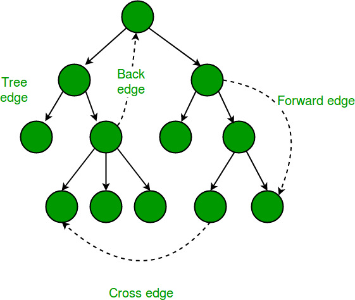
  - 순방향 간선은 DFS의 탐색 경로(트리경로)가 아니면서, 자신의 자손으로 가는 간선이다.
    - 자손의 방문이 모두 끝나야 순방향 간선에 접근할 수 있으므로, SCC를 구할 때 고려하지 않는다.
  - 역방향 간선은 트리경로가 아니면서, 자신의 조상으로 가는 간선이다.
    - 기본적으로 사이클을 의미한다.
    - `visited이면서 SCC에 아직 포함되지 않은` 간선이다.
  - 교차간선은 자식과 조상 관계에 있지 않으면서 연결된 간선이다.

In [ ]:
def tarjan(graph):
  SCC = [] 
  S = [] #DFS를 할때 사용할 스택
  depth = [0] * len(graph) #depth[i]는 노드 i의 DFS 탐색에서 처음 발견된 시간을 저장한다. 즉 DFS로 순회할 때의 방문 순서.

  # P tracks the node indices with the smallest discovery times that can be reached using zero or more outgoing edges and possibly one incoming edge.
  P = [] # 
 
  # The nodes for DFS traversal are initialized. We will go through every node even if our graph is not completely connected, 
  # to find every SCC.
  stack = [*range(len(graph))]

  while stack:
    node = stack.pop() 

    # When node < 0, it means we are on the return path of DFS. Now we check if this strongly connected component ends with 
    # the current node by comparing if there are any nodes in stack S which were discovered earlier than the root node of the SCC.
    if node < 0:
      d = depth[~node] - 1
      if P[-1] > d: 
        SCC.append(S[d:])
        del S[d:], P[-1]
        for node in SCC[-1]:
          depth[node] = -1

    # 해당 노드가 이미 방문되었고, 현재 탐색 경로에 속한다면
    elif depth[node] > 0:
      while P[-1] > depth[node]:
        P.pop()

    # If node is being visited for the first time.
    elif depth[node] == 0:
      S.append(node)
      P.append(len(S))
      depth[node] = len(S)
      stack.append(~node)
      stack += graph[node]

  return SCC[::-1]  # SCCs are returned in reverse order of their discovery

In [ ]:
def tarjan(G):
  SCC, S, P = [], [], []
  D = [0] * len(G)
 
  s = [*range(len(G))]
  while s:
    x = s.pop()
    if x < 0:
      d = D[~x] - 1
      if P[-1] > d:
        SCC.append(S[d:])
        del S[d:], P[-1]
        for x in SCC[-1]:
          D[x] = -1
    elif D[x] > 0:
      while P[-1] > D[x]:
        P.pop()
    elif D[x] == 0:
      S.append(x)
      P.append(len(S))
      D[x] = len(S)
      s.append(~x)
      s += G[x]
  return SCC[::-1]

### SCC의 압축(condensation)
- 방향그래프에서 모든 SCC 자체를 하나의 정점으로 본다면(즉, SCC를 압축한다면), DAG가 된다.
  - 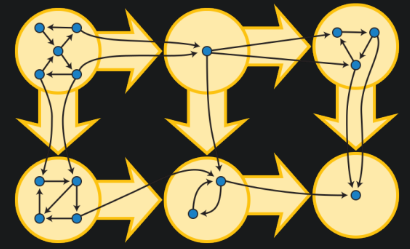
    - 노란색 노드가 압축된 SCC를 의미(노란색 공을 하나의 정점이라고 보면 된다)하고, 이 노드끼리는 사이클이 존재하지 않는다
    - (증명) SCC를 압축한 정점 `U, V, W`이 사이클을 이룬다고 하자. 그러면 `U -> V -> W -> U`의 경로가 존재한다는 뜻이다.
      - `U, V, W`는 각각의 정점으로 이동할 수 있어서 SCC의 1번 성질을 만족한다고 볼 수 있다.
      - `U, V, W`가 각각 SCC라고 했으니 2번 성질인 maximal해야 한다는 조건에 위배된다.
      - 따라서 `U, V, W`는 사이클을 이루지 않는다.
  - DAG가 성립하므로, 위상 정렬도 할 수 있다.

### 압축한 SCC의 위상 정렬
- 그래프의 각 정점의 인접한 간선 `X`에 대해서 
  - 그것이 같은 그룹의 SCC를 가리키고 있다면 압축한 내부의 SCC를 도는 것이므로 별로 의미가 없다.
  - 다른 SCC를 가리키고 있다면, 외부의 SCC를 방문한 것이 된다. 
    - 그 외부의 SCC를 `Y`라고 할때, `X`는 `Y`의 진입간선이 된다. (진입차수 + 1)

### Kosaraju's 알고리즘
- DFS를 2번해서 구하는 알고리즘.
- 압축한 SCC에 대해서 위상정렬을 하기 위한 전처리나, 정점이 몇번째 SCC 그룹에 속해있는지 등을 구하는 작업을 해야할 때 더 효율적으로 작동한다.
- SCC를 직접 구할 때 메모리와 시간을 상당히 많이 사용하므로, Tarjan's를 이용하는게 옳을 것이다.
  - 사실 SCC를 직접 구하는 부분에 문제가 있는듯 하다. 관련문제를 풀 기회가 또 있다면 그때 조사해볼 예정

In [ ]:
N, M = map(int, input().split())
G = [[] for _ in range(N)]
G_r = [[] for _ in range(N)]
for _ in range(M):
  u, v = map(int, input().split())
  G[u-1].append(v-1)
  G_r[v-1].append(u-1)

def dfs(G, S, u, vis):
  stack = [u]
  while stack:
    u = stack[-1]
    if not vis[u]:
      vis[u] = True
      for v in G[u]:
        if not vis[v]:
          stack.append(v)
      continue
    stack.pop()
    S.append(u)

def dfs2(G_r, adj, u, num, SCC_num):
  stack = [u]
  while stack:
    u = stack[-1]
    if SCC_num[u] == -1:
      SCC_num[u] = num
      # SCC_W[num] += W[u]
      for v in G_r[u]:
        if SCC_num[v] == -1:
          stack.append(v)
        elif SCC_num[u] != SCC_num[v]:
          adj[SCC_num[v]].append(SCC_num[u])
      continue
    stack.pop()

def kosaraju(G, G_r):
    N = len(G)
    vis = [False] * N
    S = []
    SCC_num = [-1] * N
    # SCC_W = []
    adj = []
    for i in range(N):
      if not vis[i]:
        dfs(G, S, i, vis)

    length = 0
    while S:
      u = S.pop()
      if SCC_num[u] == -1:
        adj.append([])
        # SCC_W.append(0)
        dfs2(G_r, adj, u, length, SCC_num)
        length += 1
    return SCC_num, length, adj